# TBCK
TBCK is a conserved protein kinase that associates with the mitotic apparatus and regulates cell size, cell proliferation, and MTOR (601231) signaling.
[Infantile hypotonia with psychomotor retardation and characteristic facies-3 (IHPRF3) ](https://omim.org/entry/616900) is caused by homozygous or compound heterozygous mutation in the TBCK gene.

In [ ]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release="v2025-01-16")
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### TBCK
We use the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for TBCK.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'TBCK'
mane_tx_id = 'NM_001163435.3'
mane_protein_id = 'NP_001156907.2' # TBC domain-containing protein kinase-like protein isoform a
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 41/41 [00:05<00:00,  7.49 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
35,Hypotonia
34,Motor delay
32,Global developmental delay
26,Seizure
20,Hyporeflexia
18,Absent speech
17,Coarse facial features
14,Macroglossia
14,"Intellectual disability, profound"
14,Narrow forehead


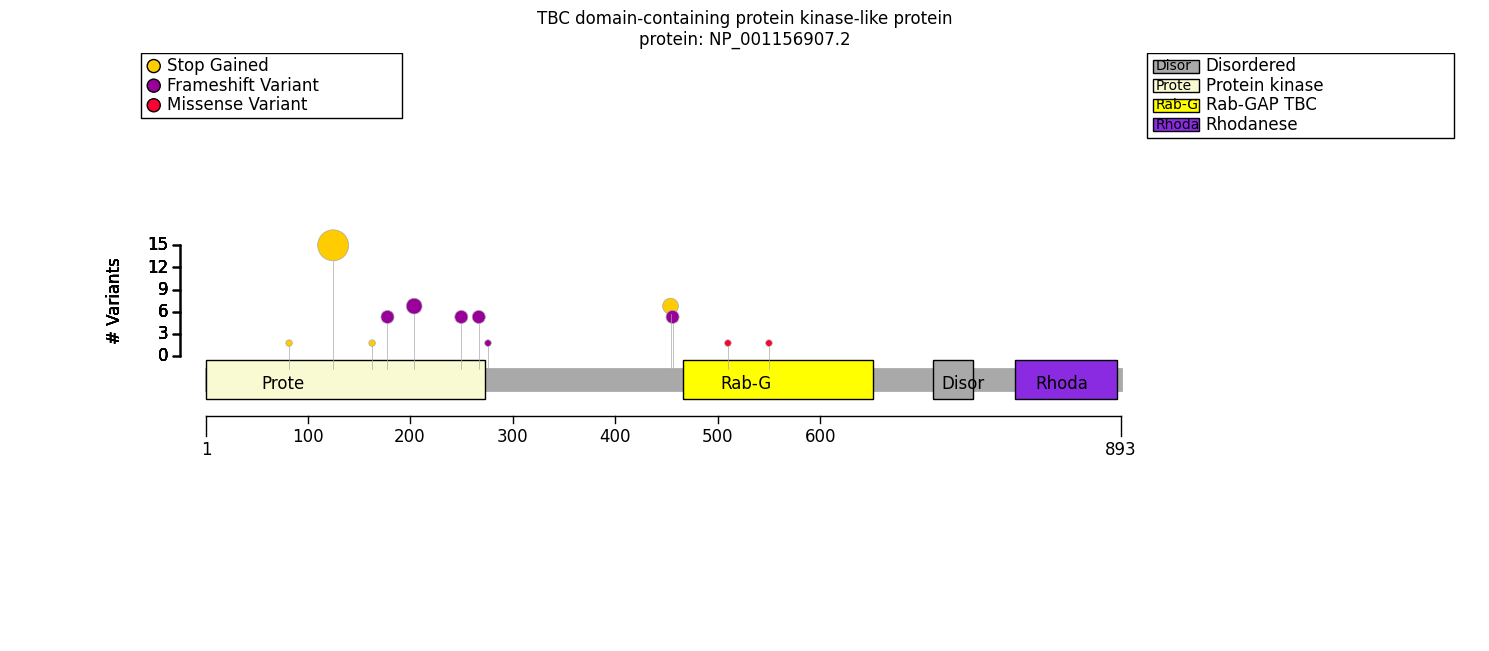

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

tbck_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
tbck_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
26,Protein kinase,Domain,2 - 273,p.Arg126Ter; p.Met268ArgfsTer26; p.Arg83Ter; p.Gln164Ter; p.Gln205ProfsTer8; p.Lys252Ter; p.Leu179ArgfsTer11
2,Rab-GAP TBC,Domain,467 - 651,p.Leu551Pro; p.Arg511His
0,Disordered,Region,711 - 749,
0,Rhodanese,Domain,791 - 889,


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import biallelic_classifier
from gpsea.model import VariantEffect
from gpsea.view import MtcStatsViewer

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf = biallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    partitions=((0,1), (2,)),
    a_label="missense", 
    b_label="other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,7
Skipping term because one genotype had zero observations,2
"Skipping ""general"" level terms",72
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),221


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,missense/missense OR missense/other,other/other,Corrected p values,p values
Seizure [HP:0001250],0/2 (0%),28/37 (76%),1.0,0.074224
11 pairs of ribs [HP:0000878],1/2 (50%),1/16 (6%),1.0,0.215686
Scoliosis [HP:0002650],1/1 (100%),3/16 (19%),1.0,0.235294
Absent speech [HP:0001344],0/1 (0%),18/23 (78%),1.0,0.250000
Hyporeflexia [HP:0001265],1/2 (50%),19/23 (83%),1.0,0.366667
Deeply set eye [HP:0000490],1/2 (50%),5/19 (26%),1.0,0.500000
Macroglossia [HP:0000158],0/2 (0%),14/32 (44%),1.0,0.500891
Microcephaly [HP:0000252],0/1 (0%),1/20 (5%),1.0,1.000000
Decreased fetal movement [HP:0001558],0/1 (0%),2/16 (12%),1.0,1.000000
Prominent metopic ridge [HP:0005487],0/1 (0%),2/20 (10%),1.0,1.000000


In [10]:
from gpsea.analysis.predicate import variant_key

r126ter = variant_key("4_106262103_106262103_G_A") #c.376C>T; p.Arg126Ter
r126ter_clf = biallelic_classifier(a_predicate=r126ter, 
                          b_predicate=~r126ter,
                          partitions=((0,), (1,2)),
                          a_label="R126*", 
                          b_label="other")
r126ter_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r126ter_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=r126ter_result)

Allele group,R126*/R126*,R126*/other OR other/other,Corrected p values,p values
Macroglossia [HP:0000158],11/12 (92%),3/22 (14%),0.000430,0.000013
Developmental regression [HP:0002376],9/12 (75%),2/22 (9%),0.002924,0.000183
Seizure [HP:0001250],12/12 (100%),16/27 (59%),0.083494,0.008690
Coarse facial features [HP:0000280],10/12 (83%),7/22 (32%),0.083494,0.010437
Scoliosis [HP:0002650],2/2 (100%),2/15 (13%),0.282353,0.044118
Global brain atrophy [HP:0002283],5/7 (71%),3/14 (21%),0.296113,0.055521
Hirsutism [HP:0001007],1/2 (50%),3/20 (15%),1.000000,0.337662
Microcephaly [HP:0000252],1/10 (10%),0/11 (0%),1.000000,0.476190
Tented upper lip vermilion [HP:0010804],0/2 (0%),7/19 (37%),1.000000,0.533333
Hyporeflexia [HP:0001265],4/4 (100%),16/21 (76%),1.000000,0.549407


In [11]:
from gpsea.analysis.clf import sex_classifier
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Macroglossia [HP:0000158],1/12 (8%),13/22 (59%),0.166987,0.009040
Coarse facial features [HP:0000280],2/12 (17%),15/22 (68%),0.166987,0.010437
Global brain atrophy [HP:0002283],1/9 (11%),7/12 (58%),0.713313,0.066873
Hyporeflexia [HP:0001265],11/12 (92%),9/13 (69%),1.000000,0.321739
Microcephaly [HP:0000252],1/7 (14%),0/14 (0%),1.000000,0.333333
Tented upper lip vermilion [HP:0010804],2/10 (20%),5/11 (45%),1.000000,0.361455
Motor delay [HP:0001270],13/14 (93%),21/21 (100%),1.000000,0.400000
Developmental regression [HP:0002376],3/13 (23%),8/21 (38%),1.000000,0.465295
11 pairs of ribs [HP:0000878],0/9 (0%),2/9 (22%),1.000000,0.470588
Hirsutism [HP:0001007],3/11 (27%),1/11 (9%),1.000000,0.586466


# Summary

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=r126ter_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = """Durham et al (2023) stated that several studies have touched on a genotype-phenotype correlation of TBCK syndrome; 
however, more data are required for statistically significant conclusions \\cite{PMID_37455236}."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [14]:
summarizer.process_latex(report=report, protein_fig=tbck_fig)

Figure saved to ../../supplement/img/TBCK_protein_diagram-draft.pdf
Output to ../../supplement/tex/TBCK_summary_draft.tex
